In [396]:
import warnings
warnings.filterwarnings('ignore')

In [397]:
import pandas as pd

xls = pd.ExcelFile("Поступления от клиентов.xlsx")

sheets = pd.read_excel(xls, sheet_name=None)
sheets

{'1':          Дата      Сумма
 0  2011-06-14   9 381,00
 1  2011-07-22   4 780,00
 2  2011-08-09   2 300,50
 3  2011-08-25   4 780,00
 4  2011-11-11   7 080,50
 5  2011-11-30  14 161,00
 6  2011-12-26  32 200,00
 7  2011-12-26   4 550,00
 8  2012-01-17  13 575,00
 9  2012-02-21   5 500,00
 10 2012-03-26  16 150,00
 11 2012-03-28  16 050,00
 12 2012-03-28  16 150,00
 13 2012-04-10   9 770,00
 14 2012-05-18  16 150,00
 15 2012-06-14  32 300,00
 16 2012-06-18  32 300,00
 17 2012-07-16  32 300,00
 18 2012-07-24  32 300,00
 19 2012-08-08  48 450,00
 20 2012-08-28   3 600,00
 21 2012-09-11  32 300,00
 22 2012-09-21   1 200,00
 23 2012-09-21  32 300,00
 24 2012-10-16  40 375,00
 25 2012-10-19   1 800,00
 26 2012-11-22  32 300,00
 27 2012-12-03   1 800,00
 28 2012-12-12  32 300,00
 29 2013-01-25   3 840,00
 30 2013-02-19   7 200,00
 31 2013-02-25  28 475,00
 32 2013-03-18   3 825,00
 33 2013-03-18   3 820,00
 34 2013-04-29  24 125,00
 35 2013-04-29   8 500,00
 36 2013-05-15   7 080,00
 37 201

In [398]:
for key in sheets:
    print(f"key = {key}\n", sheets[key].head(1))
    print()

key = 1
         Дата     Сумма
0 2011-06-14  9 381,00

key = 2
         Дата     Сумма
0 2011-09-23  7 000,00

key = 3
         Дата     Сумма
0 2011-06-01  6 290,00

key = 4
        Дата      Сумма
0  3 500,00 2011-06-06

key = 5
                  Дата     Сумма
0 2011-01-27 16:57:23  5 900,00

key = 6
         Дата      Сумма
0 2010-06-03  14 987,50



In [399]:
sheets['4']['Дата'], sheets['4']['Сумма'] = sheets['4']['Сумма'], sheets['4']['Дата']
sheets['4'].head(2)

,Дата,Сумма
0,2011-06-06,"3 500,00"
1,2011-06-17,"3 500,00"


In [400]:
sheets['1'].loc[0]

Дата     2011-06-14 00:00:00
Сумма               9 381,00
Name: 0, dtype: object

In [401]:
for key in sheets:
    print(f"key = {key}\n", sheets[key].head(1))
    print()

key = 1
         Дата     Сумма
0 2011-06-14  9 381,00

key = 2
         Дата     Сумма
0 2011-09-23  7 000,00

key = 3
         Дата     Сумма
0 2011-06-01  6 290,00

key = 4
         Дата     Сумма
0 2011-06-06  3 500,00

key = 5
                  Дата     Сумма
0 2011-01-27 16:57:23  5 900,00

key = 6
         Дата      Сумма
0 2010-06-03  14 987,50



In [402]:
def prepare(df: pd.DataFrame):

    df = df.dropna()
    df['Дата'] = pd.to_datetime(df['Дата'])
    df['Дата'] = df['Дата'] + pd.to_timedelta(df.groupby('Дата').cumcount(), unit='s')
    df['Дата'] = df['Дата'].dt.strftime('%Y-%m-%d %H:%M:%S')

    df['Сумма'] = df['Сумма'].apply(lambda x: str(x))
    df['Сумма'] = df['Сумма'].apply(lambda x: x.replace(" ", "").replace(",", "."))
    df['Сумма'] = pd.to_numeric(df['Сумма'])
    return df

for key in sheets:
    sheets[key] = prepare(df=sheets[key])
    print(f"key = {key}\n", sheets[key].head(1))


key = 1
                   Дата   Сумма
0  2011-06-14 00:00:00  9381.0
key = 2
                   Дата   Сумма
0  2011-09-23 00:00:00  7000.0
key = 3
                   Дата   Сумма
0  2011-06-01 00:00:00  6290.0
key = 4
                   Дата   Сумма
0  2011-06-06 00:00:00  3500.0
key = 5
                   Дата   Сумма
0  2011-01-27 16:57:23  5900.0
key = 6
                   Дата    Сумма
0  2010-06-03 00:00:00  14987.5


In [403]:
import matplotlib.pyplot as plt

def plot_graphics(df: pd.DataFrame, x: str, y: str, mean_value: float,
                  UCL: float, LCL: float, title: str, description: str = '', xtics: int = 2, rotation: float = 0):

    if description != '':
        plt.figure(figsize=(10, 9))
    else:
        plt.figure(figsize=(10, 5))
    
    plt.plot(df[x], df[y], marker='o', label=y, color='blue')

    plt.axhline(y=mean_value, color='green', linestyle='--', label='Среднее')
    plt.axhline(y=UCL, color='red', linestyle='--', label='UCL')
    plt.axhline(y=LCL, color='orange', linestyle='--', label='LCL')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.xticks(df[x].iloc[::xtics], rotation=rotation)
    plt.legend()
    
    if description != '':
        plt.figtext(0.5, -0.1, description, wrap=True, horizontalalignment='center', fontsize=10)

    plt.subplots_adjust(bottom=0.5)

    plt.tight_layout()
    plt.show()

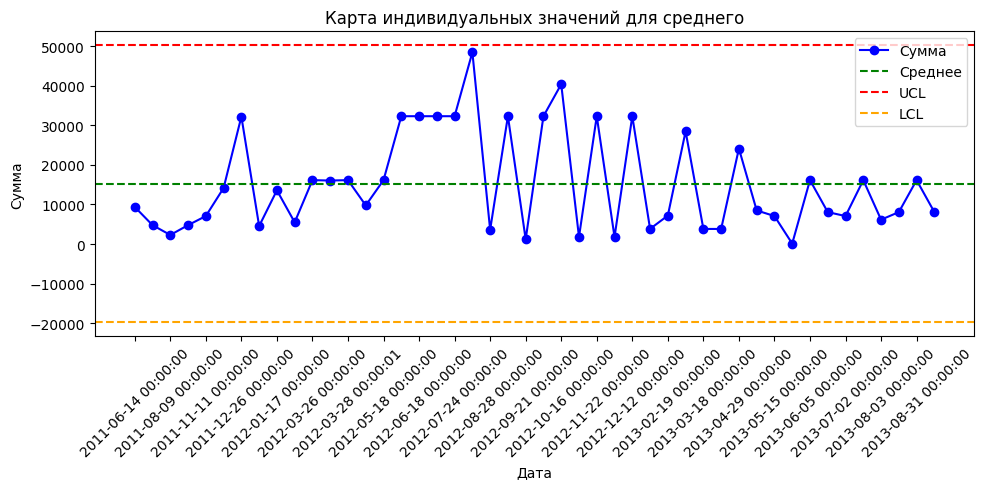

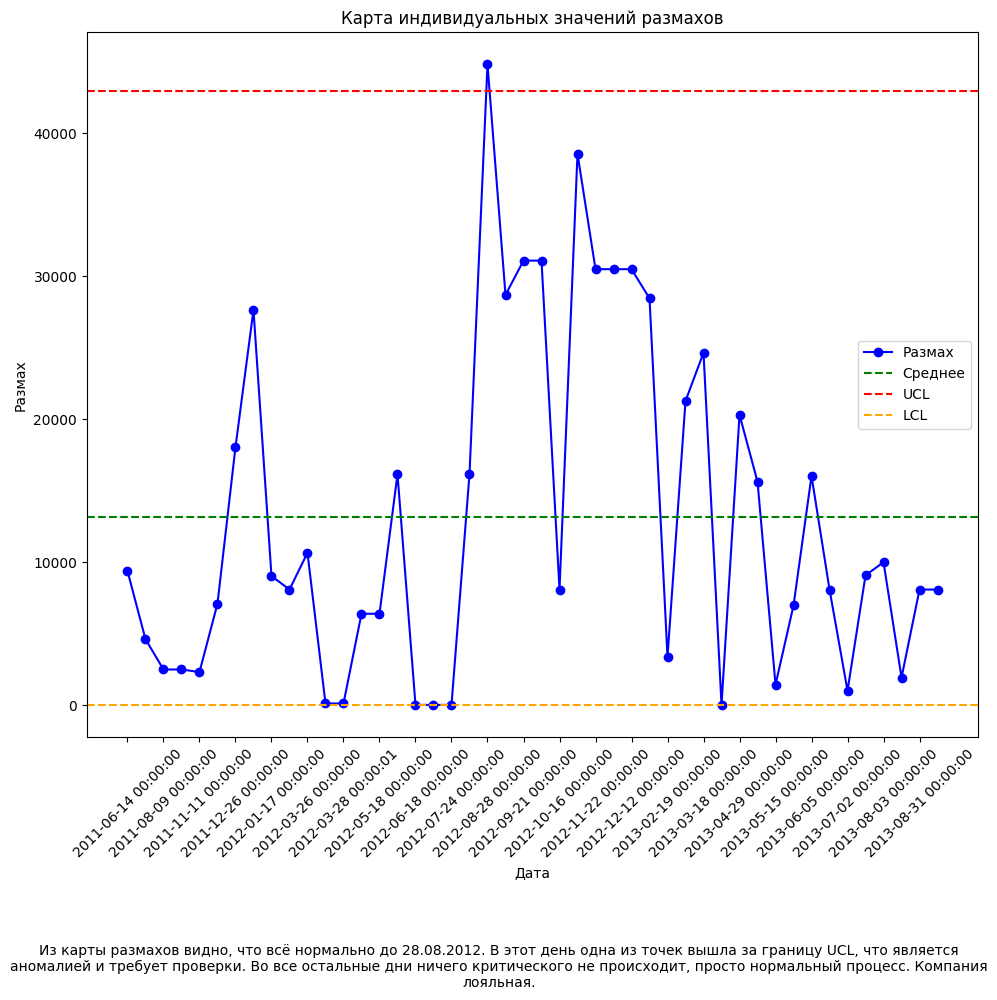

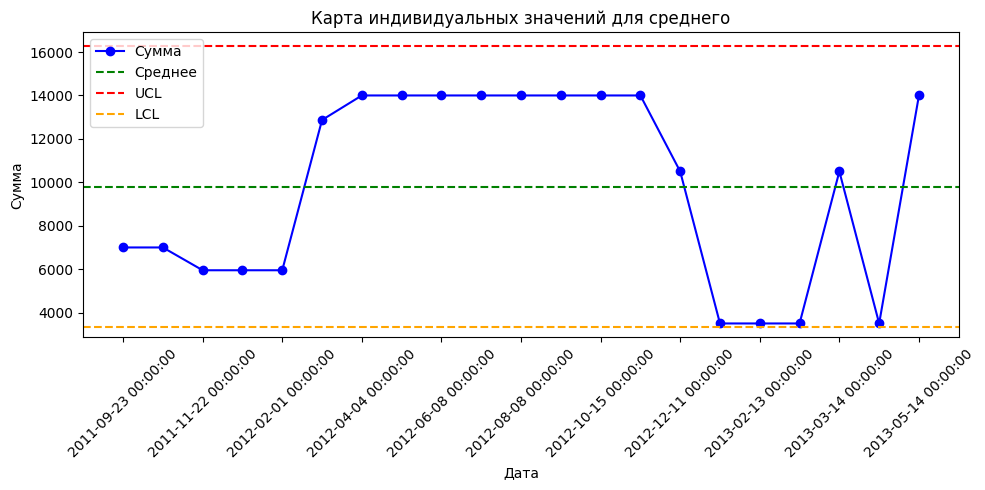

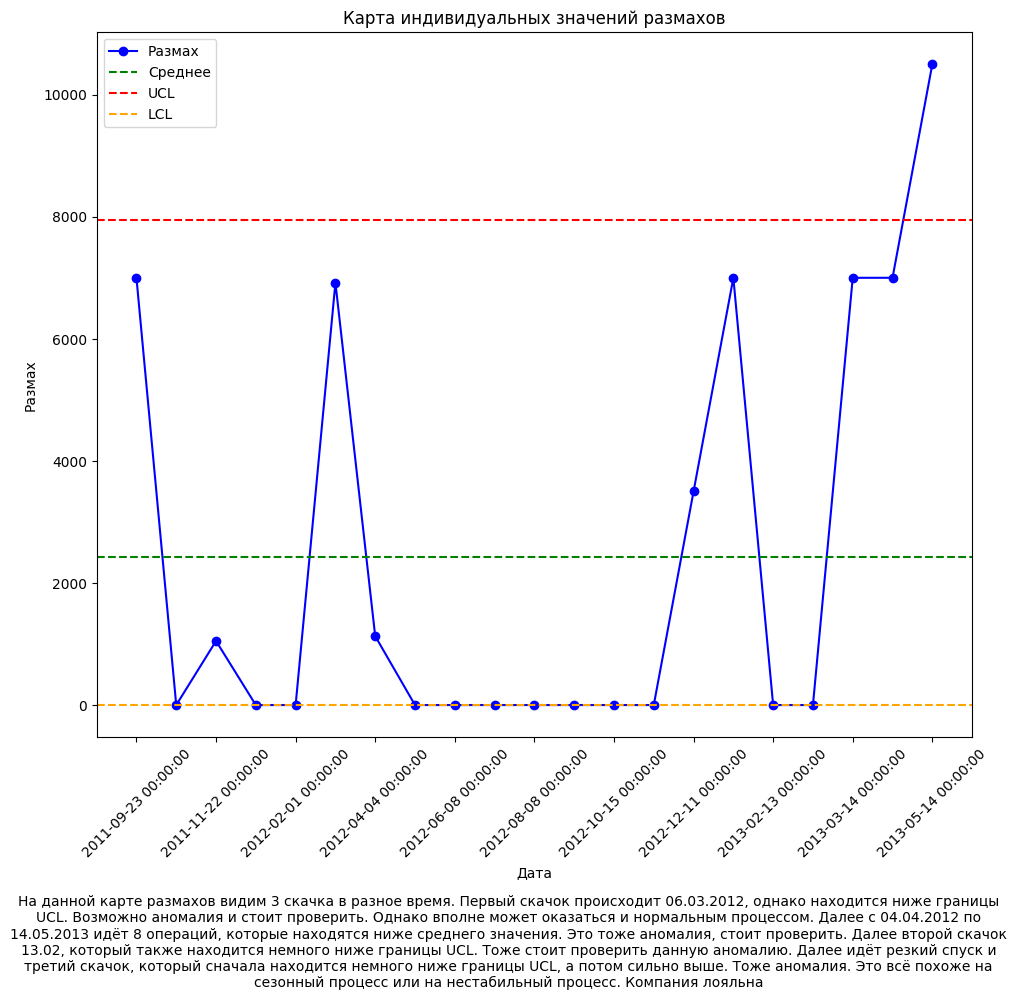

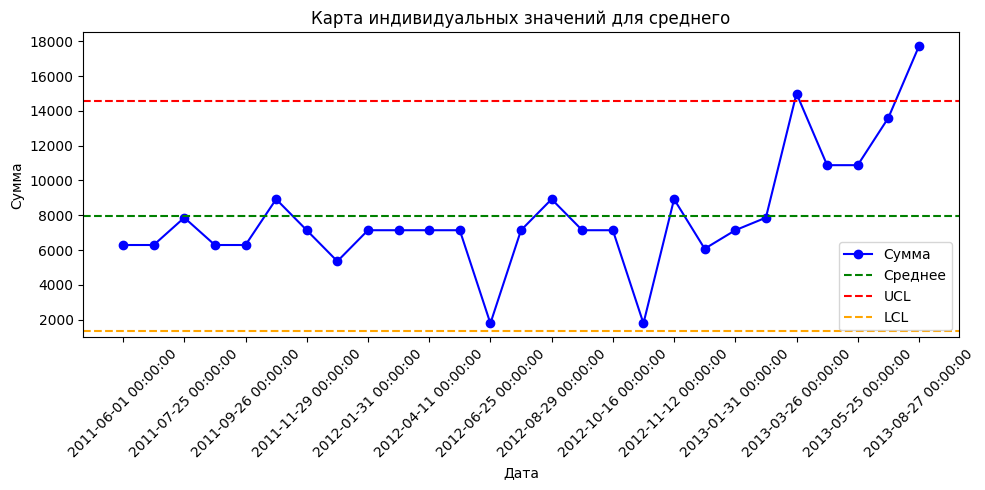

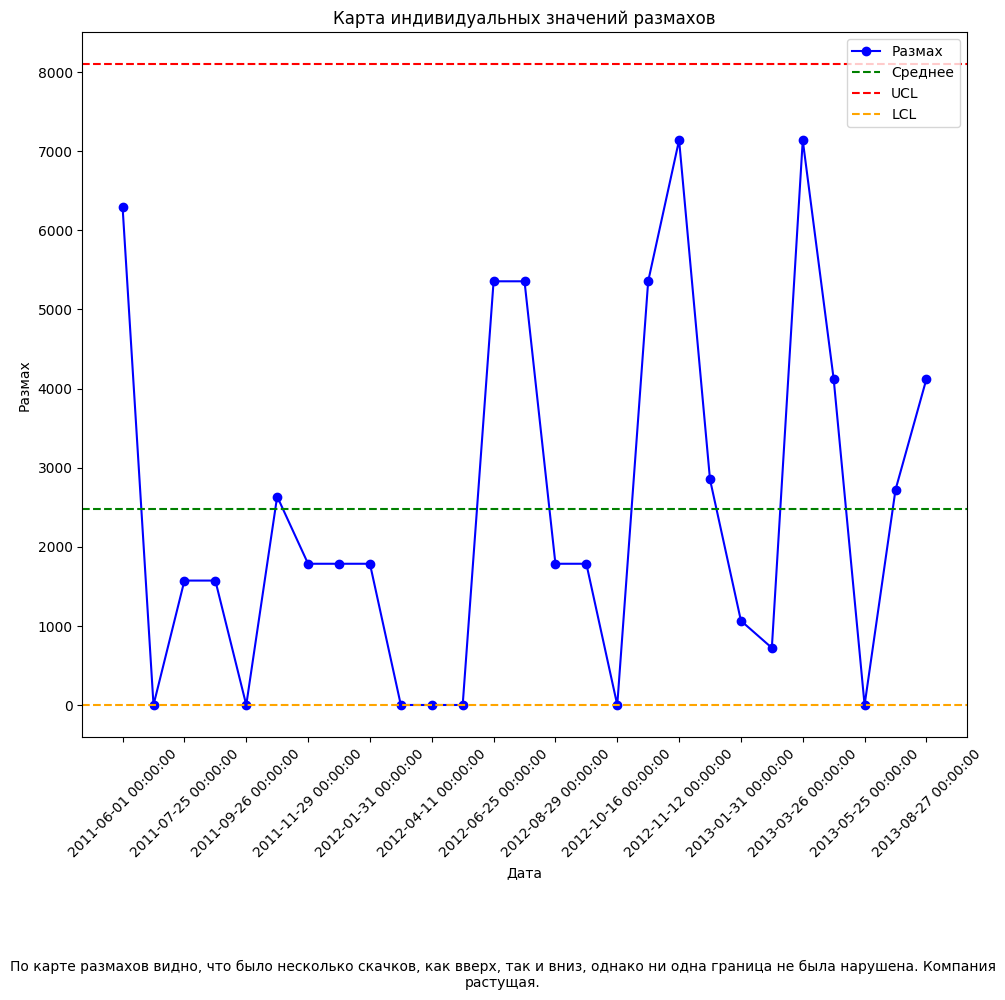

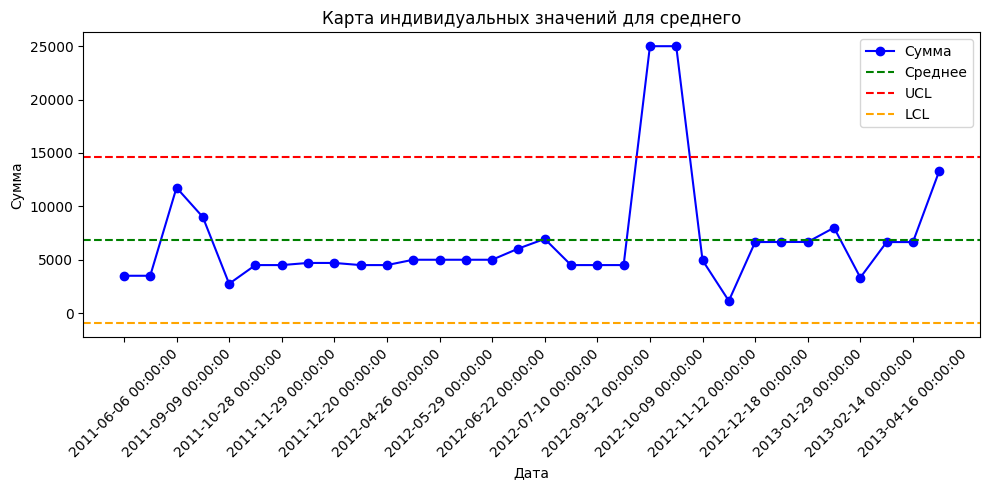

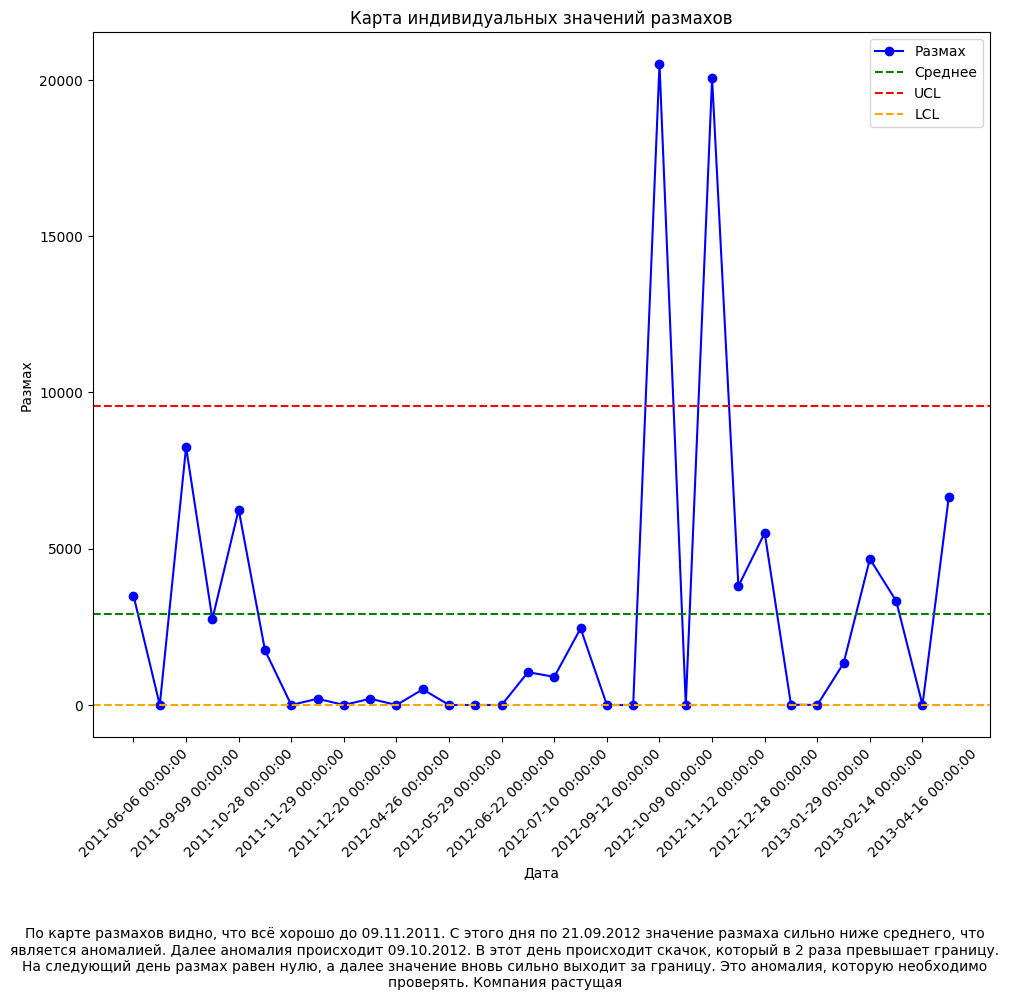

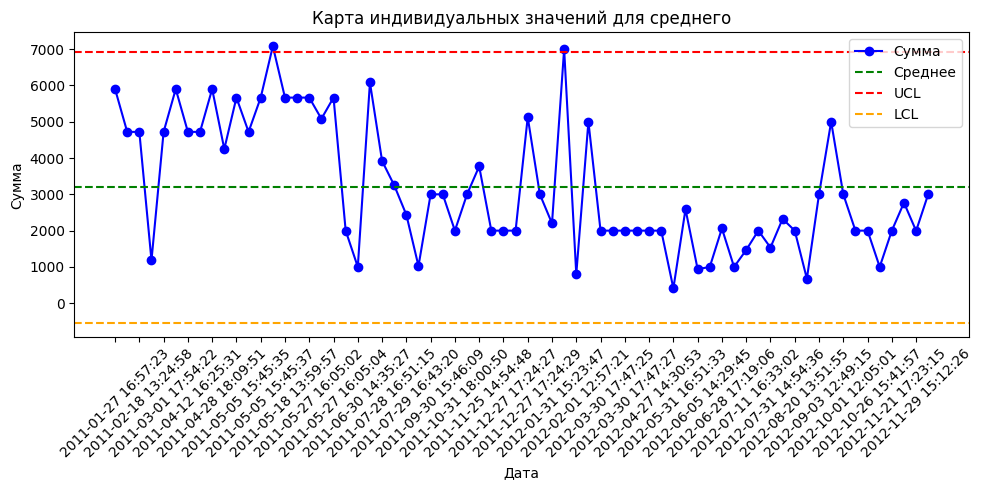

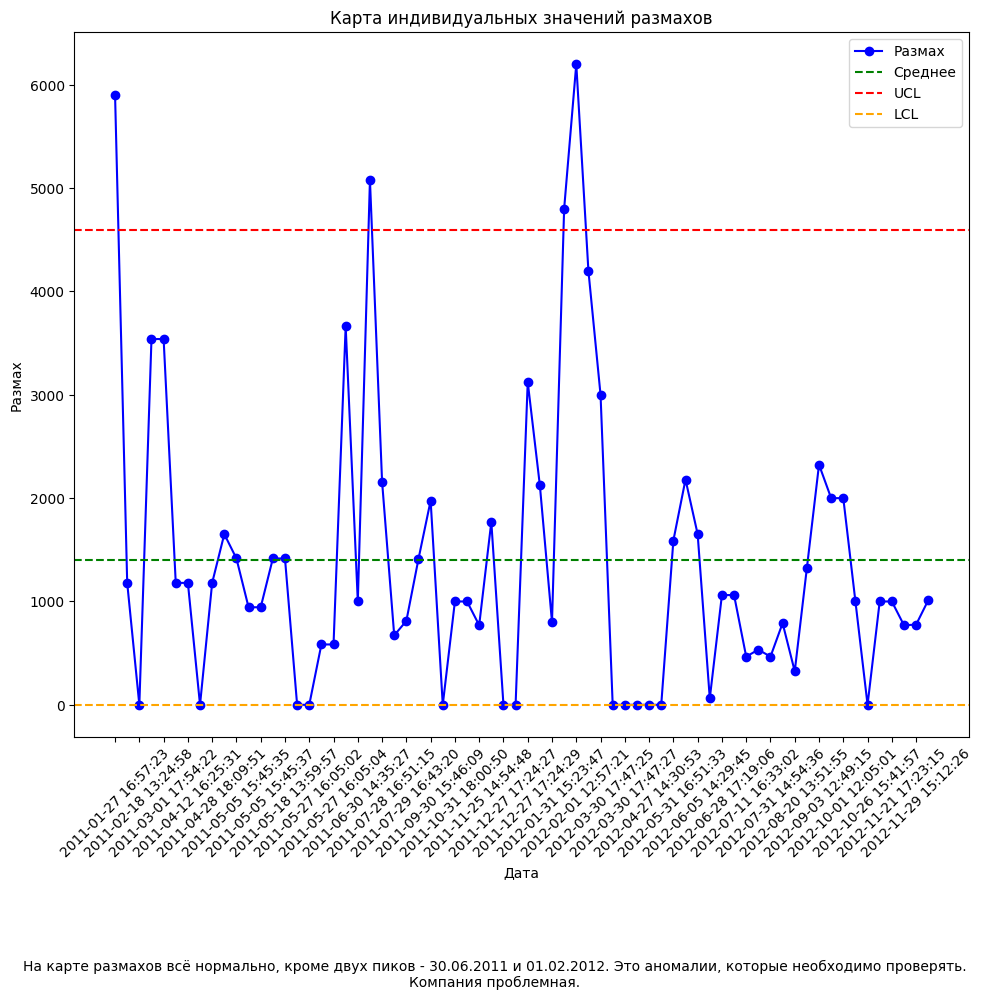

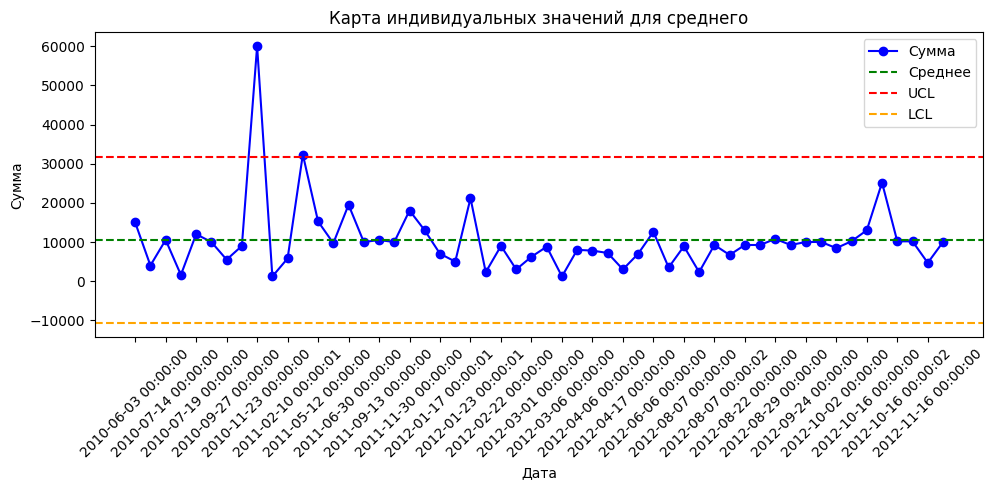

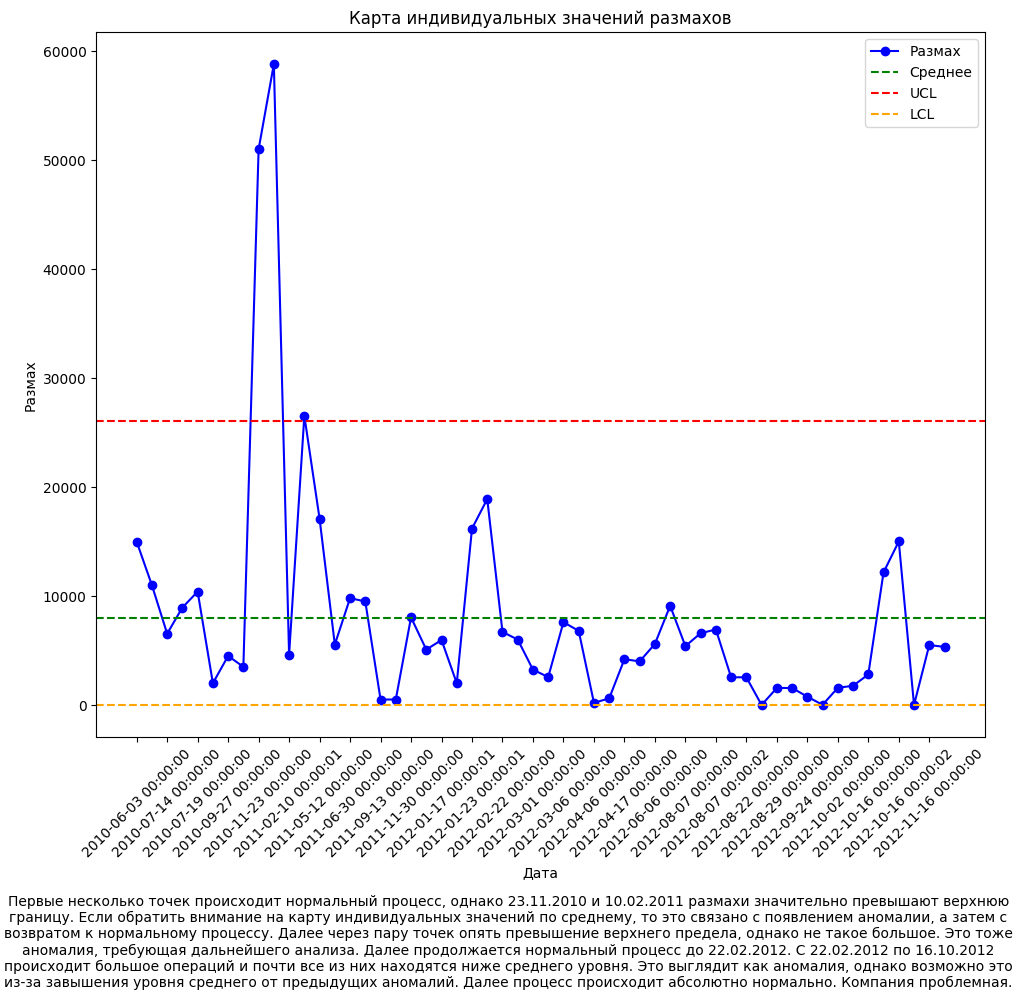

In [404]:
def make_all_variables(df: pd.DataFrame, description: str):
    df['Сумма со сдвигом'] = df['Сумма'].shift(1).fillna(0)
    df['Размах'] = (df['Сумма'] - df['Сумма со сдвигом']).abs()
    
    X_mean_value = df['Сумма'].mean()
    R_mean_value = df['Размах'].mean()
    X_UCL = X_mean_value + 2.66 * R_mean_value
    X_LCL = X_mean_value - 2.66 * R_mean_value
    
    R_UCL = 3.267 * R_mean_value
    R_LCL = 0
    
    plot_graphics(df, x='Дата', y='Сумма', mean_value=X_mean_value, UCL=X_UCL, LCL=X_LCL,
        title='Карта индивидуальных значений для среднего', rotation=45)
    plot_graphics(df, x='Дата', y='Размах', mean_value=R_mean_value, UCL=R_UCL, LCL=R_LCL,
        title='Карта индивидуальных значений размахов', description=description, rotation=45)
    
    return [df, X_mean_value, R_mean_value]


descriptions = {
    '1': "Из карты размахов видно, что всё нормально до 28.08.2012. В этот день одна из точек вышла за границу UCL, что является аномалией и требует проверки. Во все остальные дни ничего критического не происходит, просто нормальный процесс. Компания лояльная.",
    '2': "На данной карте размахов видим 3 скачка в разное время. Первый скачок происходит 06.03.2012, однако находится ниже границы UCL. Возможно аномалия и стоит проверить. Однако вполне может оказаться и нормальным процессом. Далее с 04.04.2012 по 14.05.2013 идёт 8 операций, которые находятся ниже среднего значения. Это тоже аномалия, стоит проверить. Далее второй скачок 13.02, который также находится немного ниже границы UCL. Тоже стоит проверить данную аномалию. Далее идёт резкий спуск и третий скачок, который сначала находится немного ниже границы UCL, а потом сильно выше. Тоже аномалия. Это всё похоже на сезонный процесс или на нестабильный процесс. Компания лояльна",
    '3': "По карте размахов видно, что было несколько скачков, как вверх, так и вниз, однако ни одна граница не была нарушена. Компания растущая.",
    '4': "По карте размахов видно, что всё хорошо до 09.11.2011. С этого дня по 21.09.2012 значение размаха сильно ниже среднего, что является аномалией. Далее аномалия происходит 09.10.2012. В этот день происходит скачок, который в 2 раза превышает границу. На следующий день размах равен нулю, а далее значение вновь сильно выходит за границу. Это аномалия, которую необходимо проверять. Компания растущая",
    '5': "На карте размахов всё нормально, кроме двух пиков - 30.06.2011 и 01.02.2012. Это аномалии, которые необходимо проверять. Компания проблемная.",
    '6': "Первые несколько точек происходит нормальный процесс, однако 23.11.2010 и 10.02.2011 размахи значительно превышают верхнюю границу. Если обратить внимание на карту индивидуальных значений по среднему, то это связано с появлением аномалии, а затем с возвратом к нормальному процессу. Далее через пару точек опять превышение верхнего предела, однако не такое большое. Это тоже аномалия, требующая дальнейшего анализа. Далее продолжается нормальный процесс до 22.02.2012. С 22.02.2012 по 16.10.2012 происходит большое операций и почти все из них находятся ниже среднего уровня. Это выглядит как аномалия, однако возможно это из-за завышения уровня среднего от предыдущих аномалий. Далее процесс происходит абсолютно нормально. Компания проблемная.",
}


X_mean_values, R_mean_values = [], []
for key in sheets:
    sheets[key], X_mean_value, R_mean_value = make_all_variables(df=sheets[key], description=descriptions[key])
    X_mean_values.append(X_mean_value)
    R_mean_values.append(R_mean_value)

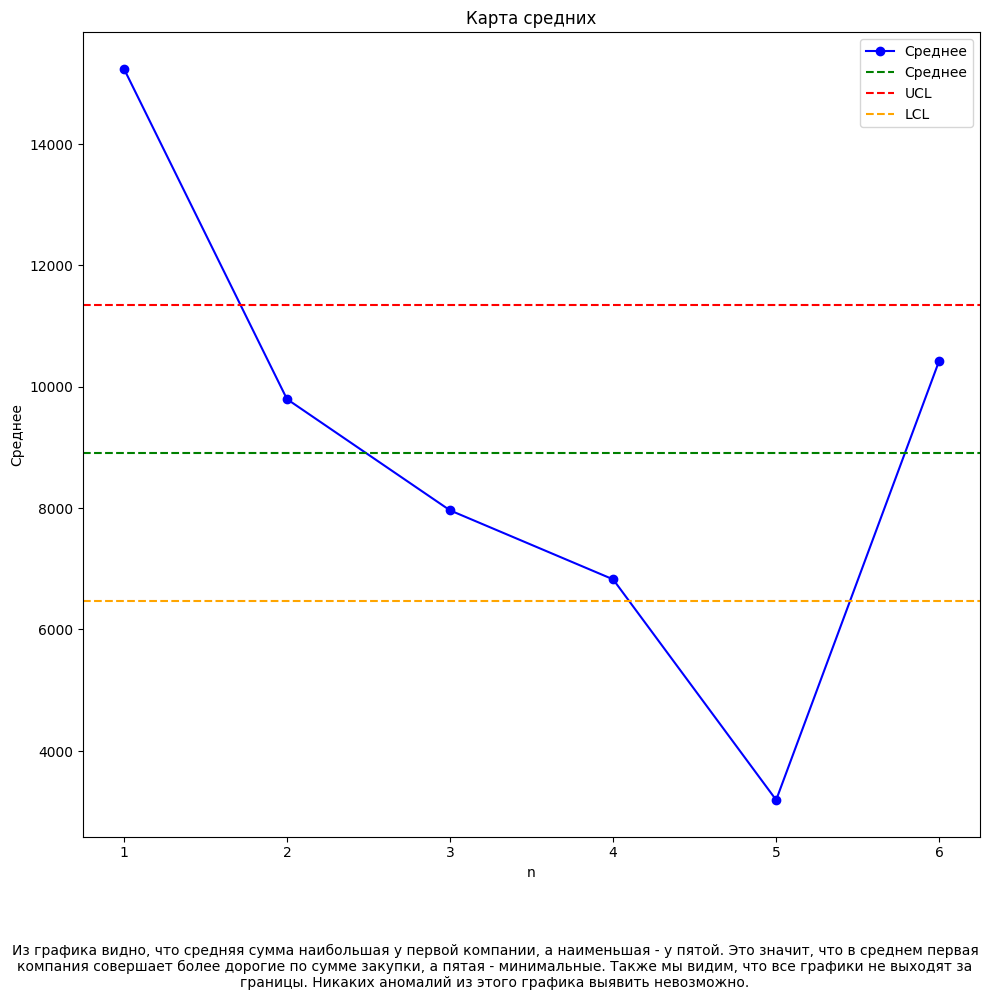

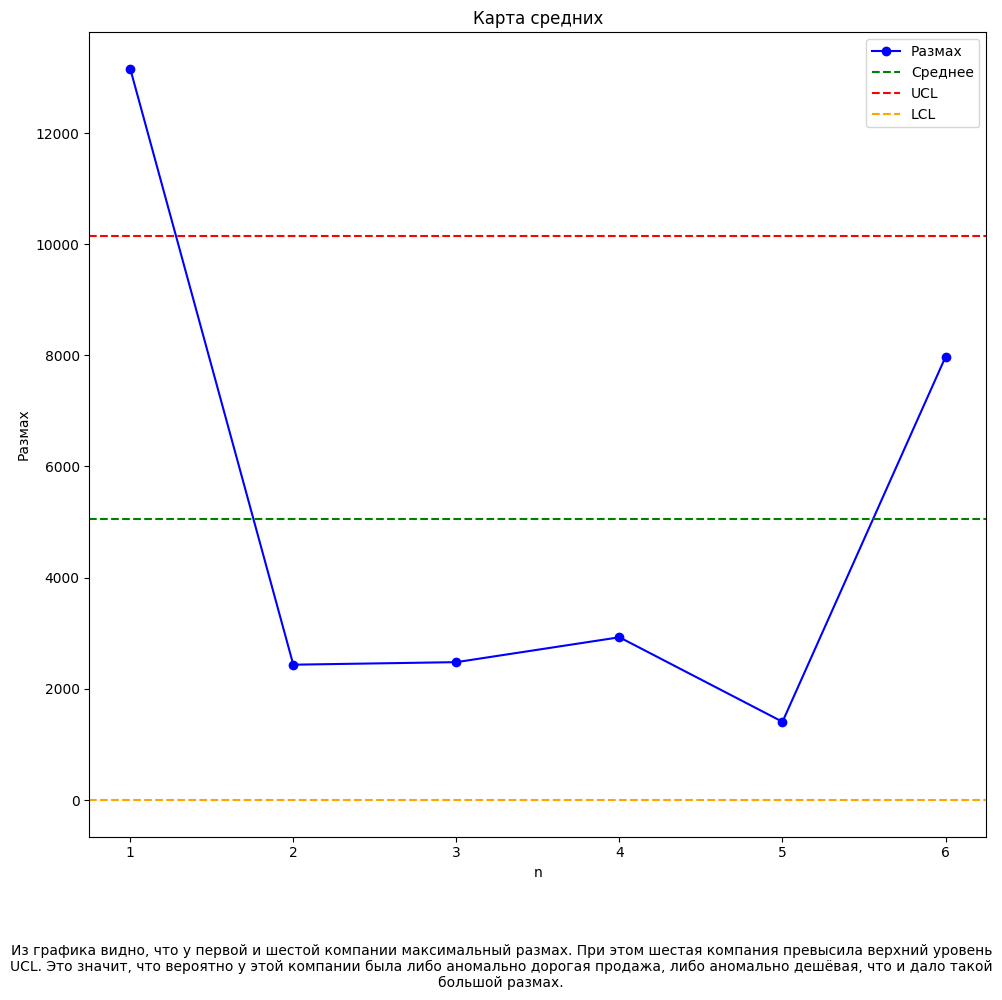

In [405]:
import numpy as np

A2 = 0.483
D3 = 0
D4 = 2.004

mean_X_mean_values = sum(X_mean_values) / len(X_mean_values)
mean_R_mean_values = sum(R_mean_values) / len(R_mean_values)

X_UCL = mean_X_mean_values + A2 * mean_R_mean_values
X_LCL = mean_X_mean_values - A2 * mean_R_mean_values

R_UCL = D4 * mean_R_mean_values
R_LCL = D3 * mean_R_mean_values

data = np.array([[i for i in range(1, 7)], X_mean_values, R_mean_values])
data = data.T

new_df = pd.DataFrame(data=data, columns=['n', 'Среднее', 'Размах'])

description = 'Из графика видно, что средняя сумма наибольшая у первой компании, а наименьшая - у пятой. Это значит, что в среднем первая компания совершает более дорогие по сумме закупки, а пятая - минимальные. Также мы видим, что все графики не выходят за границы. Никаких аномалий из этого графика выявить невозможно.'
plot_graphics(new_df, x='n', y='Среднее', mean_value=mean_X_mean_values, UCL=X_UCL, LCL=X_LCL, title='Карта средних', description=description, xtics=1)

description = 'Из графика видно, что у первой и шестой компании максимальный размах. При этом шестая компания превысила верхний уровень UCL. Это значит, что вероятно у этой компании была либо аномально дорогая продажа, либо аномально дешёвая, что и дало такой большой размах.'
plot_graphics(new_df, x='n', y='Размах', mean_value=mean_R_mean_values, UCL=R_UCL, LCL=R_LCL, title='Карта средних', description=description, xtics=1)